In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftshift
import scipy.signal
import matplotlib.pyplot as plt

from rfutils import *

In [2]:
SAMP_RATE = 50e6 # samples per second
FFT_SIZE = 65536*4*4*4 # bins
TIME = 0.1 # seconds of recording

raw = np.fromfile('./data/own/IQREC-02-03-19-13h38m31s479.iq', dtype='int16')
raw = raw[0 : len(raw) : 2] + 1.0j * raw[0 : len(raw) : 2]
raw = raw[0:int(TIME * SAMP_RATE)]

In [3]:
NOISE_DB = 30 # dB
TX_DB = -10 # dB
ts = np.linspace(0, TIME, TIME*SAMP_RATE, endpoint=False)
chirp = scipy.signal.chirp(ts, f0=2e6, t1=TIME*20, f1=20e6, method='linear')
sig = np.power(10, TX_DB / 10)*(chirp.copy() / np.max(chirp)) + np.power(10, NOISE_DB / 10)*(raw / np.max(raw))

/home/rytse/anaconda3/envs/irss/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


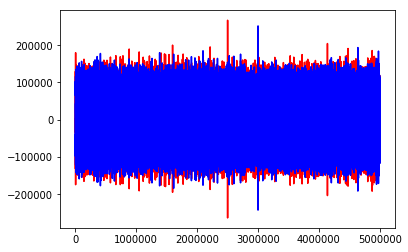

500000

In [4]:
cor1 = xcorr(sig, chirp)
delayed = delay_sig(sig, 5000*100)
cor2 = xcorr(delayed, chirp)

plt.plot(fftshift(cor1), c='r')
plt.plot(fftshift(cor2), c='b')
plt.show()

np.argmax(cor2)

In [ ]:
# cfreq = (2e6 + 20e6) / 2
# passw = (3e6 - 2e6) / 2
# stop_l = cfreq - 1.2 * passw
# stop_h = cfreq + 1.2 * passw

cfreq = 2e6 + (20e6 - 2e6) / 20 / 2 
passw = (0.06e6) / 2
stop_l = cfreq - 1.2 * passw
stop_h = cfreq + 1.2 * passw

bpf = design_remez(10000, cfreq, passw, stop_l, stop_h, SAMP_RATE)
freq, response = scipy.signal.freqz(bpf)
plt.semilogy(0.5 * SAMP_RATE * freq / np.pi, np.abs(response), 'b-')
plt.show()

filtd = scipy.signal.lfilter(bpf, [1], delayed)
cor3 = xcorr(filtd, chirp)
plt.plot(fftshift(cor3), c='r')
plt.show()

np.argmax(cor3)

In [ ]:
template = scipy.signal.chirp(ts, f0=2e6, t1=TIME*20, f1=20e6 * 1.00, method='linear')
cor1 = xcorr(sig, template)
delayed = delay_sig(sig, 5000*100)
cor2 = xcorr(delayed, template)
plt.plot(fftshift(cor1), c='r')
plt.plot(fftshift(cor2), c='b')
plt.show()

ed = np.argmax(cor2)
vm = delayed[ed]
ptot = np.sum(delayed * delayed) / len(delayed)

print('Peak Power Ratio Correct: ' + str(vm / ptot))

template = scipy.signal.chirp(ts, f0=2e6, t1=TIME*20, f1=20e6 * 1.001, method='linear')
cor1 = xcorr(sig, template)
delayed = delay_sig(sig, 5000*100)
cor2 = xcorr(delayed, template)
plt.plot(fftshift(cor1), c='r')
plt.plot(fftshift(cor2), c='b')
plt.show()

ed = np.argmax(cor2)
vm = delayed[ed]
ptot = np.sum(delayed * delayed) / len(delayed)

print('Peak Power Ratio Offset: ' + str(vm / ptot))

template = scipy.signal.chirp(ts, f0=2e6, t1=TIME*20, f1=20e6 * 0.995, method='linear')
cor1 = xcorr(sig, template)
delayed = delay_sig(sig, 5000*100)
cor2 = xcorr(delayed, template)
plt.plot(fftshift(cor1), c='r')
plt.plot(fftshift(cor2), c='b')
plt.show()

ed = np.argmax(cor2)
vm = delayed[ed]
ptot = np.sum(delayed * delayed) / len(delayed)

print('Peak Power Ratio Offset: ' + str(vm / ptot))